In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [51]:
c_data = pd.read_csv('benchmarking/results/c_benchmark.csv')
java_data = pd.read_csv('benchmarking/results/java_benchmark.csv')
ts_data = pd.read_csv('benchmarking/results/ts_benchmark.csv')

def get_rounded_means(array):
    return list(map(lambda x: round(x,2), array["mean"].to_numpy()))

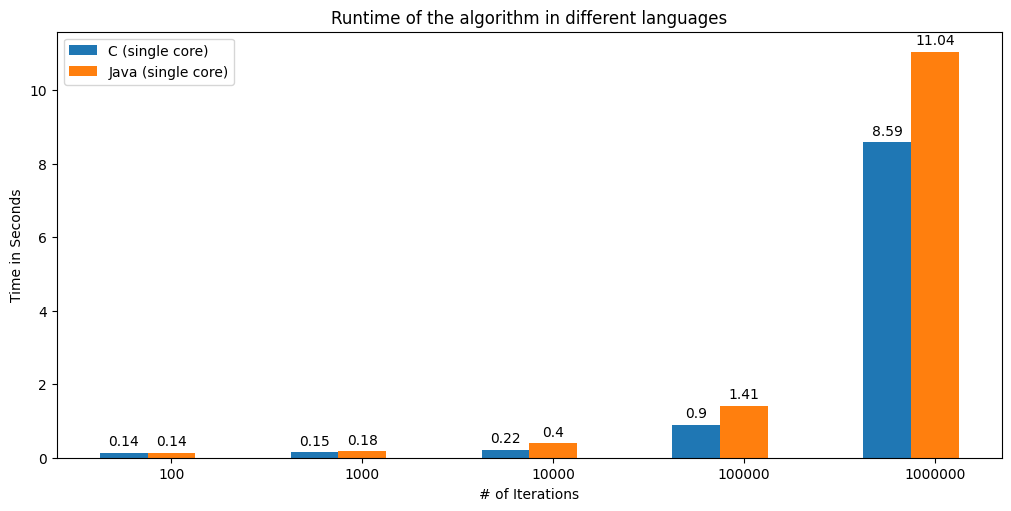

In [54]:
runs = c_data["parameter_runs"].to_numpy()
means = {
    "C (single core)": get_rounded_means(c_data),
    "Java (single core)": get_rounded_means(java_data),
    "Nodejs (single core)": get_rounded_means(ts_data),
}

x = np.arange(len(runs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained", figsize=(15, 15))

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xlabel("# of Iterations")
ax.set_ylabel("Time in Seconds")
ax.set_title("Runtime of the algorithm in different languages")
ax.set_xticks(x + width, runs)
ax.legend(loc="upper left")
# ax.set_ylim(0, 250)

plt.show()
